In [623]:
import pandas as pd
from datetime import datetime
import math
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [624]:
df = pd.read_csv('MF_Large_1998_2018.csv')
df['month'] = df['date'].map(lambda x:x[5:])
df['year'] = df['date'].map(lambda x:x[:4])
df['date']=(df['month'] + '-' + df['year'])
df['date']=pd.to_datetime(df.date)
df['qtr'] = pd.to_datetime(df.date).dt.quarter
df=df[df['tna']>0]
df[df.tna.notnull()]
df.head()

,fundid,date,mret,mktrf,rf,tna,month,year,qtr
0,G2000015W100006,1998-01-01,0.697587,0.15,0.43,6755.058,1,1998,1
1,G2000015W100006,1998-02-01,6.946265,7.04,0.39,7276.757,2,1998,1
2,G2000015W100006,1998-03-01,5.359197,4.76,0.39,7753.945,3,1998,1
3,G2000015W100006,1998-04-01,-0.851419,0.73,0.43,7760.438,4,1998,2
4,G2000015W100006,1998-05-01,-1.751137,-3.07,0.40,7679.779,5,1998,2


In [625]:
df1=pd.DataFrame(df.groupby(['fundid','year', 'qtr'])[['mret']].agg('mean')).reset_index()
df2=df.merge(df1, on=['fundid', 'year', 'qtr'])
df2.head()

,fundid,date,mret_x,mktrf,rf,tna,month,year,qtr,mret_y
0,G2000015W100006,1998-01-01,0.697587,0.15,0.43,6755.058,1,1998,1,4.334350
1,G2000015W100006,1998-02-01,6.946265,7.04,0.39,7276.757,2,1998,1,4.334350
2,G2000015W100006,1998-03-01,5.359197,4.76,0.39,7753.945,3,1998,1,4.334350
3,G2000015W100006,1998-04-01,-0.851419,0.73,0.43,7760.438,4,1998,2,-0.855358
4,G2000015W100006,1998-05-01,-1.751137,-3.07,0.40,7679.779,5,1998,2,-0.855358


In [626]:
df2['rank']=df2.groupby(['year', 'qtr'])[['mret_y']].transform(lambda x: pd.qcut(x, 10, 
                                                                            labels=['0-10', '10-20', 
                                                                                   '20-30', '30-40', '40-50', 
                                                                                   '50-60', '60-70', '70-80',
                                                                                   '80-90', '90-100']))
df2.head()

,fundid,date,mret_x,mktrf,rf,tna,month,year,qtr,mret_y,rank
0,G2000015W100006,1998-01-01,0.697587,0.15,0.43,6755.058,1,1998,1,4.334350,60-70
1,G2000015W100006,1998-02-01,6.946265,7.04,0.39,7276.757,2,1998,1,4.334350,60-70
2,G2000015W100006,1998-03-01,5.359197,4.76,0.39,7753.945,3,1998,1,4.334350,60-70
3,G2000015W100006,1998-04-01,-0.851419,0.73,0.43,7760.438,4,1998,2,-0.855358,10-20
4,G2000015W100006,1998-05-01,-1.751137,-3.07,0.40,7679.779,5,1998,2,-0.855358,10-20


In [627]:
options=['90-100']

In [628]:
df3 = df2.loc[df2['rank'].isin(options)]
a=df3.index.values.tolist() 
print (a[:5])
three_mo=[]
for i in a:
    c=i+3
    three_mo.append(c)
print (three_mo[:5])

[30, 31, 63, 64, 65]
[33, 34, 66, 67, 68]
[32, 33, 65, 66, 67]
[31, 32, 64, 65, 66]


In [707]:
df_three_mo=df2.ix[three_mo]
#df4.groupby(['year', 'month'])[['mret_x']].mean()
df5=pd.DataFrame(df_three_mo.groupby(['year', 'month', 'mktrf', 'rf'])[['mret_x']].agg('mean')).reset_index()
df5['date']=df5['year']+ '-' + df5['month']
df5['date']=pd.to_datetime(df5.date)
df5.sort_values(by=['date'], inplace=True, ascending=True)
df5[:5]

one_horizon=['1', '4', '7', '10']
df_one_horizon=df5.loc[df5['month'].isin(one_horizon)]
df_one_horizon

two_horizon=['2', '5', '8', '11']
df_two_horizon=df5.loc[df5['month'].isin(two_horizon)]
df_two_horizon

three_horizon=['3', '6', '9', '12']
df_three_horizon=df5.loc[df5['month'].isin(three_horizon)]
df_three_horizon[:5]

,year,month,mktrf,rf,mret_x,date
5,1998,3,4.76,0.39,4.795350,1998-03-01
8,1998,6,3.18,0.41,4.580149,1998-06-01
11,1998,9,6.15,0.46,7.740978,1998-09-01
3,1998,12,6.16,0.38,5.895126,1998-12-01
17,1999,3,3.45,0.43,6.025571,1999-03-01


In [630]:
avg_month_ret=pd.DataFrame(df.groupby(['date', 'mktrf', 'rf'])['mret'].agg('mean')).reset_index()
avg_month_ret['date'] = pd.to_datetime(avg_month_ret['date'])
avg_month_ret[:5]

,date,mktrf,rf,mret
0,1998-01-01,0.15,0.43,0.393934
1,1998-02-01,7.04,0.39,6.828735
2,1998-03-01,4.76,0.39,4.380415
3,1998-04-01,0.73,0.43,0.842686
4,1998-05-01,-3.07,0.40,-2.289235


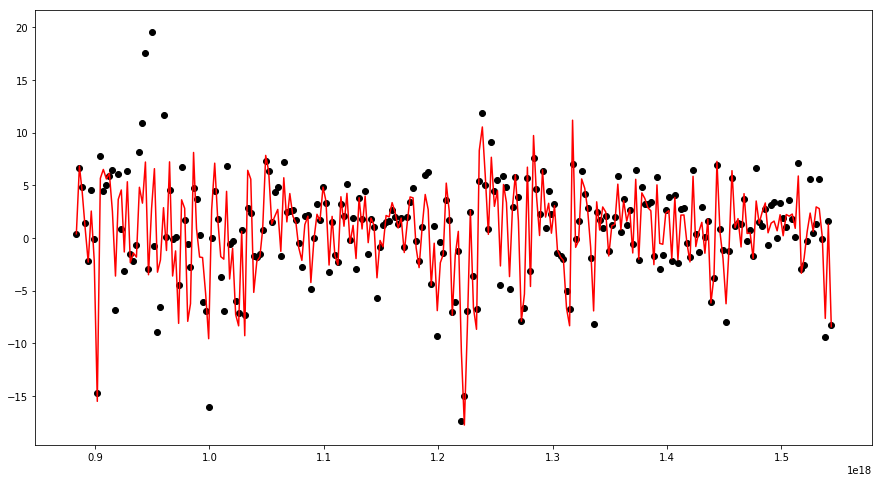

In [631]:
plt.figure(figsize=(15,8));
#%pylab inline
plt.plot(avg_month_ret['date'].astype('int'), avg_month_ret['mret'], color='red')
plt.scatter(df5['date'].astype('int'), df5['mret_x'], color='black')

Value Weighted

In [634]:
df_three_mo_value=pd.DataFrame(df_three_mo.groupby(['year', 'month'])[['tna']].agg('sum')).reset_index()
df_three_mo_value['date']=df_three_mo_value['year']+ '-' + df_three_mo_value['month']
df_three_mo_value['date']=pd.to_datetime(df_three_mo_value.date)
df_three_mo_value.sort_values(by=['date'], inplace=True, ascending=True)
df_three_mo_value[:5]

df_two_mo_value=pd.DataFrame(df_two_mo.groupby(['year', 'month'])[['tna']].agg('sum')).reset_index()
df_two_mo_value['date']=df_two_mo_value['year']+ '-' + df_two_mo_value['month']
df_two_mo_value['date']=pd.to_datetime(df_two_mo_value.date)
df_two_mo_value.sort_values(by=['date'], inplace=True, ascending=True)
df_two_mo_value[:5]

df_one_mo_value=pd.DataFrame(df_one_mo.groupby(['year', 'month'])[['tna']].agg('sum')).reset_index()
df_one_mo_value['date']=df_one_mo_value['year']+ '-' + df_one_mo_value['month']
df_one_mo_value['date']=pd.to_datetime(df_one_mo_value.date)
df_one_mo_value.sort_values(by=['date'], inplace=True, ascending=True)
df_one_mo_value[:5]

df_three_mo_value[:5]

,year,month,tna,date
0,1998,1,163120.147,1998-01-01
4,1998,2,169975.175,1998-02-01
5,1998,3,174395.208,1998-03-01
6,1998,4,74174.442,1998-04-01
7,1998,5,73556.020,1998-05-01


In [635]:
merged_three_mo = pd.merge(df_three_mo, df_three_mo_value, on=['date'], how='inner')
merged_three_mo['tna_weighted']=(merged_three_mo['tna_x']/merged_three_mo['tna_y'])*merged_three_mo['mret_x']
merged_three_mo['excess_returns']=merged_three_mo['tna_weighted']-merged_three_mo['rf']
three_mo_value_weighted=pd.DataFrame(merged_three_mo.groupby(['year_x', 'month_x', 'rf', 'mktrf'])[['tna_weighted']].agg('sum')).reset_index()
three_mo_value_weighted['date']=three_mo_value_weighted['year_x']+ '-' + three_mo_value_weighted['month_x']
three_mo_value_weighted['date']=pd.to_datetime(three_mo_value_weighted.date)
three_mo_value_weighted.sort_values(by=['date'], inplace=True, ascending=True)
three_mo_value_weighted['excess_returns']=three_mo_value_weighted['tna_weighted']-three_mo_value_weighted['rf']

merged_two_mo = pd.merge(df_two_mo, df_two_mo_value, on=['date'], how='inner')
merged_two_mo['tna_weighted']=(merged_two_mo['tna_x']/merged_two_mo['tna_y'])*merged_two_mo['mret_x']
merged_two_mo['excess_returns']=merged_two_mo['tna_weighted']-merged_two_mo['rf']
two_mo_value_weighted=pd.DataFrame(merged_two_mo.groupby(['year_x', 'month_x', 'rf', 'mktrf'])[['tna_weighted']].agg('sum')).reset_index()
two_mo_value_weighted['date']=two_mo_value_weighted['year_x']+ '-' + two_mo_value_weighted['month_x']
two_mo_value_weighted['date']=pd.to_datetime(two_mo_value_weighted.date)
two_mo_value_weighted.sort_values(by=['date'], inplace=True, ascending=True)
two_mo_value_weighted['excess_returns']=two_mo_value_weighted['tna_weighted']-two_mo_value_weighted['rf']

merged_one_mo = pd.merge(df_one_mo, df_one_mo_value, on=['date'], how='inner')
merged_one_mo['tna_weighted']=(merged_one_mo['tna_x']/merged_one_mo['tna_y'])*merged_one_mo['mret_x']
merged_one_mo['excess_returns']=merged_one_mo['tna_weighted']-merged_one_mo['rf']
one_mo_value_weighted=pd.DataFrame(merged_one_mo.groupby(['year_x', 'month_x', 'rf', 'mktrf'])[['tna_weighted']].agg('sum')).reset_index()
one_mo_value_weighted['date']=one_mo_value_weighted['year_x']+ '-' + one_mo_value_weighted['month_x']
one_mo_value_weighted['date']=pd.to_datetime(one_mo_value_weighted.date)
one_mo_value_weighted.sort_values(by=['date'], inplace=True, ascending=True)
one_mo_value_weighted['excess_returns']=one_mo_value_weighted['tna_weighted']-one_mo_value_weighted['rf']

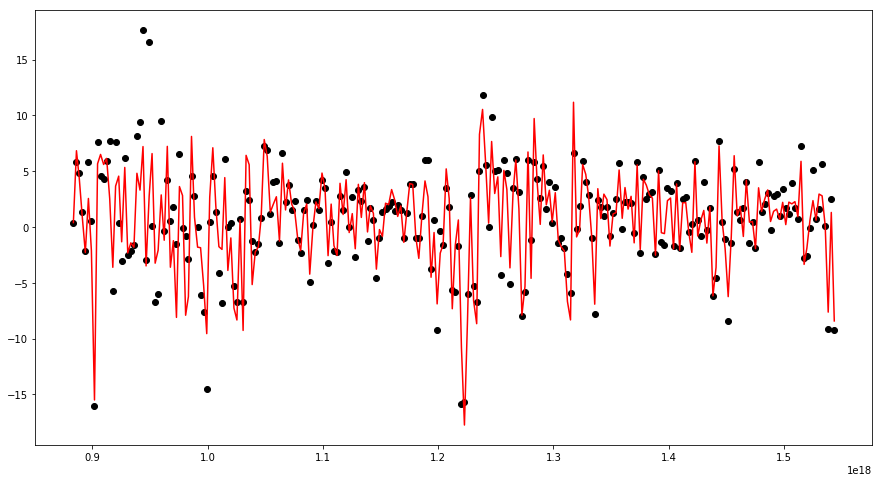

In [636]:
plt.figure(figsize=(15,8));
#%pylab inline
plt.scatter(three_mo_value_weighted['date'].astype('int'), three_mo_value_weighted['tna_weighted'], color='black')
plt.plot(avg_month_ret['date'].astype('int'), avg_month_ret['mret'], color='red')

In [639]:
merged_three_mo['excess_returns']=merged_three_mo['tna_weighted']-merged_three_mo['rf']
merged_two_mo['excess_returns']=merged_two_mo['tna_weighted']-merged_two_mo['rf']
merged_one_mo['excess_returns']=merged_one_mo['tna_weighted']-merged_one_mo['rf']

In [640]:
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

y, X = dmatrices('excess_returns ~ mktrf', data=value_weighted, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         excess_returns   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     778.2
Date:                Tue, 22 Oct 2019   Prob (F-statistic):           9.86e-79
Time:                        12:23:30   Log-Likelihood:                -565.23
No. Observations:                 252   AIC:                             1134.
Df Residuals:                     250   BIC:                             1142.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2726      0.145      1.878      0.061      -0.013       0.558
mktrf          0.9023      0.032     27.897      0.000       0.839       0.966
==============================================================================
Omnibus:                       80.725   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.000
Skew:                           1.080   Prob(JB):                    2.02e-118
Kurtosis:                       9.852   Cond. No.                         4.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Equal Weighted Long vs. Short

In [751]:
bottom=['0-10']

In [752]:
bottom_pf = df2.loc[df2['rank'].isin(bottom)]
x=bottom_pf.index.values.tolist() 
print (x[:5])
three_mo_short=[]
for i in x:
    p=i+3
    (three_mo_short.append(p))
print (three_mo_short[:5])


[9, 10, 11, 18, 19]
[12, 13, 14, 21, 22]


In [753]:
three_mo_equal_short=df2.ix[three_mo_short]
three_mo_short_pf=pd.DataFrame(three_mo_equal_short.groupby(['year', 'month', 'mktrf', 'rf'])[['mret_x']].agg('mean')).reset_index()
three_mo_short_pf['date']=three_mo_short_pf['year']+ '-' + three_mo_short_pf['month']
three_mo_short_pf['date']=pd.to_datetime(three_mo_short_pf.date)
three_mo_short_pf.sort_values(by=['date'], inplace=True, ascending=True)
three_mo_short_pf[:5]


three_mo_short = three_mo_short_pf.loc[three_mo_short_pf['month'].isin(three_horizon)]
three_mo_short[:5]

two_mo_short =three_mo_short_pf[three_mo_short_pf['month'].isin(two_horizon)]
two_mo_short[:5]

one_mo_short =three_mo_short_pf[three_mo_short_pf['month'].isin(one_horizon)]
one_mo_short[:5]

,year,month,mktrf,rf,mret_x,date
0,1998,1,0.15,0.43,0.724279,1998-01-01
6,1998,4,0.73,0.43,0.490144,1998-04-01
9,1998,7,-2.46,0.40,-5.142323,1998-07-01
1,1998,10,7.13,0.32,7.030435,1998-10-01
12,1999,1,3.50,0.35,-1.973787,1999-01-01


In [754]:
df_one_horizon[:5]

,year,month,mktrf,rf,mret_x,date
0,1998,1,0.15,0.43,0.364988,1998-01-01
6,1998,4,0.73,0.43,1.450399,1998-04-01
9,1998,7,-2.46,0.40,-0.092176,1998-07-01
1,1998,10,7.13,0.32,4.497928,1998-10-01
12,1999,1,3.50,0.35,6.464198,1999-01-01


In [755]:
three_mo_equal_ret=(df_three_horizon['mret_x'])-three_mo_short['mret_x']
two_mo_equal_ret=(df_two_horizon['mret_x'])-two_mo_short['mret_x']
one_mo_equal_ret=(df_one_horizon['mret_x'])-one_mo_short['mret_x']
one_mo_equal_ret[:5]

0    -0.359291
6     0.960255
9     5.050147
1    -2.532507
12    8.437985
Name: mret_x, dtype: float64

In [774]:
three_mo_equal_excess_returns=three_mo_equal_ret-three_mo_short['rf']
two_mo_equal_excess_returns=two_mo_equal_ret-two_mo_short['rf']
one_mo_equal_excess_returns=one_mo_equal_ret-one_mo_short['rf']
one_mo_equal_excess_returns[:5]

0    -0.789291
6     0.530255
9     4.650147
1    -2.852507
12    8.087985
dtype: float64

In [777]:
three_mo_model_df = pd.DataFrame(
    {'date' : three_mo_short['date'], 'equal_excess_returns': three_mo_equal_excess_returns,
     'mktrf': three_mo_short['mktrf']/100, 'three_mo_equal_ret': three_mo_equal_ret/100
    })
three_mo_model_df[:5]

,date,equal_excess_returns,mktrf,three_mo_equal_ret
5,1998-03-01,-0.003441,0.0476,0.003866
8,1998-06-01,3.260536,0.0318,0.036705
11,1998-09-01,1.424197,0.0615,0.018842
3,1998-12-01,0.331893,0.0616,0.007119
17,1999-03-01,2.796204,0.0345,0.032262


In [779]:
two_mo_model_df = pd.DataFrame(
    {'date' : two_mo_short['date'], 'equal_excess_returns': two_mo_equal_excess_returns,
     'mktrf': two_mo_short['mktrf']/100, 'two_mo_equal_ret':two_mo_equal_ret/100
    })
two_mo_model_df[:5]

,date,equal_excess_returns,mktrf,two_mo_equal_ret
4,1998-02-01,0.316385,0.0704,0.007064
7,1998-05-01,-0.693001,-0.0307,-0.002930
10,1998-08-01,4.068292,-0.1608,0.044983
2,1998-11-01,0.998618,0.0610,0.013086
16,1999-02-01,-5.794899,-0.0408,-0.054449


In [780]:
one_mo_model_df = pd.DataFrame(
    {'date' : one_mo_short['date'], 'equal_excess_returns': one_mo_equal_excess_returns,
     'mktrf': one_mo_short['mktrf']/100, 'one_mo_equal_ret': one_mo_equal_ret/100
    })
one_mo_model_df[:5]

,date,equal_excess_returns,mktrf,one_mo_equal_ret
0,1998-01-01,-0.789291,0.0015,-0.003593
6,1998-04-01,0.530255,0.0073,0.009603
9,1998-07-01,4.650147,-0.0246,0.050501
1,1998-10-01,-2.852507,0.0713,-0.025325
12,1999-01-01,8.087985,0.0350,0.084380


In [781]:
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

y, X = dmatrices('three_mo_equal_ret ~ mktrf', data=three_mo_model_df, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     three_mo_equal_ret   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.1173
Date:                Tue, 22 Oct 2019   Prob (F-statistic):              0.733
Time:                        21:58:33   Log-Likelihood:                 158.05
No. Observations:                  84   AIC:                            -312.1
Df Residuals:                      82   BIC:                            -307.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0075      0.004      1.829      0.071      -0.001       0.016
mktrf          0.0331      0.097      0.342      0.733      -0.159       0.226
==============================================================================
Omnibus:                       26.483   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.618
Skew:                           0.830   Prob(JB):                     3.16e-23
Kurtosis:                       8.182   Cond. No.                         23.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [782]:
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

y, X = dmatrices('two_mo_equal_ret ~ mktrf', data=two_mo_model_df, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       two_mo_equal_ret   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.882
Date:                Tue, 22 Oct 2019   Prob (F-statistic):              0.174
Time:                        21:58:34   Log-Likelihood:                 139.75
No. Observations:                  84   AIC:                            -275.5
Df Residuals:                      82   BIC:                            -270.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0091      0.005      1.795      0.076      -0.001       0.019
mktrf         -0.1554      0.113     -1.372      0.174      -0.381       0.070
==============================================================================
Omnibus:                       73.711   Durbin-Watson:                   1.653
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.439
Skew:                           2.597   Prob(JB):                    3.87e-144
Kurtosis:                      15.717   Cond. No.                         22.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [783]:
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

y, X = dmatrices('one_mo_equal_ret ~ mktrf', data=one_mo_model_df, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       one_mo_equal_ret   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.757
Date:                Tue, 22 Oct 2019   Prob (F-statistic):              0.189
Time:                        21:58:34   Log-Likelihood:                 166.10
No. Observations:                  84   AIC:                            -328.2
Df Residuals:                      82   BIC:                            -323.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0005      0.004     -0.137      0.892      -0.008       0.007
mktrf         -0.1049      0.079     -1.325      0.189      -0.262       0.053
==============================================================================
Omnibus:                        3.942   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.220
Skew:                          -0.371   Prob(JB):                        0.200
Kurtosis:                       3.607   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

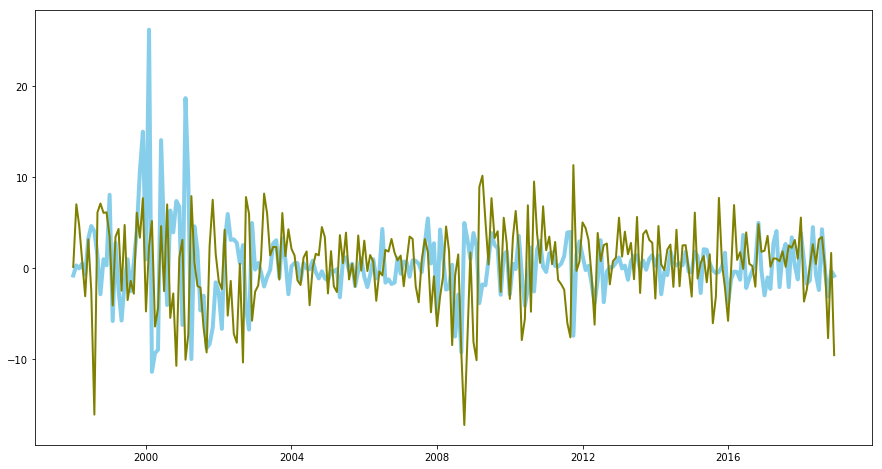

In [652]:
#plt.plot(model_df['equal_excess_returns'], model_df['mktrf'], color='blue')
#model_df['date'].plot(y = ['equal_excess_returns',"mktrf"],figsize=(20,10))
plt.figure(figsize=(15,8));
plt.plot( 'date', 'equal_excess_returns', data=model_df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'date', 'mktrf', data=model_df, marker='', color='olive', linewidth=2)

Value Weighted Long vs. Short

In [653]:
short_value=pd.DataFrame(short.groupby(['year', 'month'])[['tna']].agg('sum')).reset_index()
short_value['date']=short_value['year']+ '-' + short_value['month']
short_value['date']=pd.to_datetime(short_value.date)
short_value.sort_values(by=['date'], inplace=True, ascending=True)
short_value[:5]

,year,month,tna,date
0,1998,1,82949.523,1998-01-01
4,1998,2,140398.073,1998-02-01
5,1998,3,166870.389,1998-03-01
6,1998,4,116958.620,1998-04-01
7,1998,5,116330.176,1998-05-01


In [654]:
mergedValue = pd.merge(short, short_value, on=['date'], how='inner')
mergedValue['tna_weighted']=(mergedValue['tna_x']/mergedValue['tna_y'])*mergedValue['mret_x']
mergedValue['excess_returns']=mergedValue['tna_weighted']-mergedValue['rf']
short_value_weighted=pd.DataFrame(mergedValue.groupby(['year_x', 'month_x', 'rf', 'mktrf'])[['tna_weighted']].agg('sum')).reset_index()
short_value_weighted['date']=short_value_weighted['year_x']+ '-' + short_value_weighted['month_x']
short_value_weighted['date']=pd.to_datetime(short_value_weighted.date)
short_value_weighted.sort_values(by=['date'], inplace=True, ascending=True)
short_value_weighted['excess_returns']=short_value_weighted['tna_weighted']-short_value_weighted['rf']
short_value_weighted[:5]

,year_x,month_x,rf,mktrf,tna_weighted,date,excess_returns
0,1998,1,0.43,0.15,0.796344,1998-01-01,0.366344
4,1998,2,0.39,7.04,5.194263,1998-02-01,4.804263
5,1998,3,0.39,4.76,3.708158,1998-03-01,3.318158
6,1998,4,0.43,0.73,0.452404,1998-04-01,0.022404
7,1998,5,0.40,-3.07,-1.427456,1998-05-01,-1.827456


In [655]:
value_ret=value_weighted['tna_weighted']-short_value_weighted['tna_weighted']
value_ret[:5]

0   -0.473019
4    0.634618
5    1.128858
6    0.893072
7   -0.720724
Name: tna_weighted, dtype: float64

In [656]:
val_excess_ret=value_ret-value_weighted['rf']
val_excess_ret[:5]

0   -0.903019
4    0.244618
5    0.738858
6    0.463072
7   -1.120724
dtype: float64

In [657]:
model_df1 = pd.DataFrame(
    {'date' : value_weighted['date'], 'val_excess_ret': val_excess_ret,
     'mktrf': value_weighted['mktrf'],
    })
model_df1[:5]

,date,val_excess_ret,mktrf
0,1998-01-01,-0.903019,0.15
4,1998-02-01,0.244618,7.04
5,1998-03-01,0.738858,4.76
6,1998-04-01,0.463072,0.73
7,1998-05-01,-1.120724,-3.07


In [658]:
import statsmodels.api as sm
from patsy import dmatrices
import numpy as np

y, X = dmatrices('val_excess_ret ~ mktrf', data=model_df1, return_type='dataframe')
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         val_excess_ret   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.900
Date:                Tue, 22 Oct 2019   Prob (F-statistic):              0.169
Time:                        12:23:34   Log-Likelihood:                -697.05
No. Observations:                 252   AIC:                             1398.
Df Residuals:                     250   BIC:                             1405.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4108      0.245      1.678      0.095      -0.071       0.893
mktrf         -0.0752      0.055     -1.378      0.169      -0.183       0.032
==============================================================================
Omnibus:                       98.116   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.546
Skew:                           1.365   Prob(JB):                    2.25e-149
Kurtosis:                      10.599   Cond. No.                         4.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

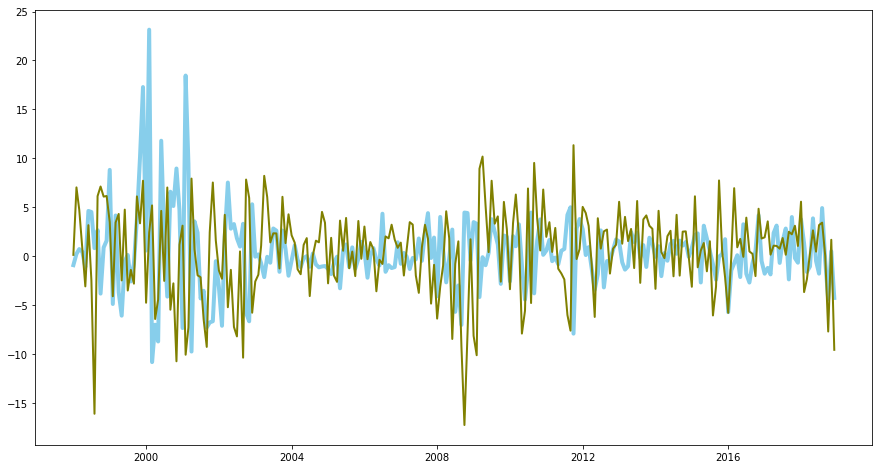

In [659]:
plt.figure(figsize=(15,8));
plt.plot( 'date', 'val_excess_ret', data=model_df1, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'date', 'mktrf', data=model_df1, marker='', color='olive', linewidth=2)